# Hash Table Optional Project

In [29]:
class Node: #Node class
    def __init__(self,item = None):
        self.item = item
        self.prev = None
        self.next = None
    def __str__(self):
        return str(self.item[0]) + ': ' + str(self.item[1])

class LinkedList: #LinkedList Class
    def __init__(self):
        self.first = None
        self.last = None
        self.list_size = 0
    def add_node(self, node, side = 'front'):
        if self.list_size == 0:
            self.first = node
            self.last = node
        elif side == 'front':
            node.next = self.first
            self.first.prev = node
            self.first = node
        elif side == 'back':
            node.prev = self.last
            self.last.next = node
            self.last = node
        self.list_size += 1
    def delete_node(self,index):
        if self.list_size == 0:
            return
        if index < 0 or index > self.list_size-1:
            return
        if self.list_size == 1:
            self.first = None
            self.last = None
        elif index == 0:
            self.first.next.prev = None
            self.first = self.first.next
        elif index == self.list_size-1:
            self.last.prev.next = None
            self.last = self.last.prev
        else:
            p = self.first
            for i in range(index+1):
                p = p.next
            p.prev.prev.next = p
            p.prev = p.prev.prev
        self.list_size -= 1
    def __str__(self):
        string = ''
        p = self.first
        while p != None:
            if p == self.last:
                string += str(p)
            else:
                string += str(p) + ', '
            p = p.next
        return string
    

                 

I chose to implement the hash table using chaining. I initiate the table with size 10.

In [30]:
class HashTable_NoScaling:
    def __init__(self) -> None:
        self.table = [LinkedList() for _ in range(10)]
        self.m = 10
        self.n = 0
        self.load_factor = 0
    
    def __hash(self, key):
        pre = hash(key)
        return pre % self.m
    def __getitem__(self,key):
        hash = self.__hash(key)
        p = self.table[hash].first
        while p != None:
            if key == p.item[0]:
                return p.item[1]
            p = p.next
        raise KeyError("Key not found in dictionary")
    def __setitem__(self,key,value):
        hash = self.__hash(key)
        p = self.table[hash].first
        while p != None:
            if key == p.item[0]:
                p.item = (key,value)
                return
            p = p.next
        node = Node((key,value))
        self.table[hash].add_node(node)
        self.n += 1
        self.load_factor = self.n/self.m
    def __delitem__(self,key):
        hash = self.__hash(key)
        p = self.table[hash].first
        index = 0
        while p != None:
            if key == p.item[0]:
                self.table[hash].delete_node(index)
                self.n -= 1
                self.load_factor = self.n/self.m
                return
            p = p.next
            index += 1
        raise KeyError("Key not found in dictionary")
    def __str__(self):
        string = '{'
        for i in range(len(self.table)):
            if str(self.table[i]) == '':
                continue
            else:
                string += str(self.table[i]) + ', '
        string = string.strip(', ')
        return string + '}'
    

I implemented scaling by doubling the size of the table whenever the load factor reaches 1 or greater. 

In [31]:
class HashTable:
    def __init__(self) -> None:
        self.table = [LinkedList() for _ in range(10)]
        self.m = 10
        self.n = 0
        self.load_factor = 0
    
    def __hash(self, key):
        pre = hash(key)
        return pre % self.m
    
    def __getitem__(self,key):
        hash = self.__hash(key)
        p = self.table[hash].first
        while p != None:
            if key == p.item[0]:
                return p.item[1]
            p = p.next
        raise KeyError("Key not found in dictionary")
    
    def __setitem__(self,key,value):
        hash = self.__hash(key)
        p = self.table[hash].first
        while p != None:
            if key == p.item[0]:
                p.item = (key,value)
                return
            p = p.next
        node = Node((key,value))
        self.table[hash].add_node(node)
        self.n += 1
        self.load_factor = self.n/self.m
        if self.load_factor >= 1: #double table size when load factor is 1 or greater
            self.__table_double()

    def __delitem__(self,key):
        hash = self.__hash(key)
        p = self.table[hash].first
        index = 0
        while p != None:
            if key == p.item[0]:
                self.table[hash].delete_node(index)
                self.n -= 1
                self.load_factor = self.n/self.m
                return
            p = p.next
            index += 1
        raise KeyError("Key not found in dictionary")
    
    def __table_double(self):
        self.m *= 2
        self.n = 0
        self.load_factor = self.n/self.m
        temp = self.table
        self.table = [LinkedList() for _ in range(self.m)]
        for list in temp:
            p = list.first
            while p != None:
                self.__setitem__(p.item[0],p.item[1])
                p = p.next

    def __str__(self):
        string = '{'
        for i in range(len(self.table)):
            if str(self.table[i]) == '':
                continue
            else:
                string += str(self.table[i]) + ', '
        string = string.strip(', ')
        return string + '}'
    

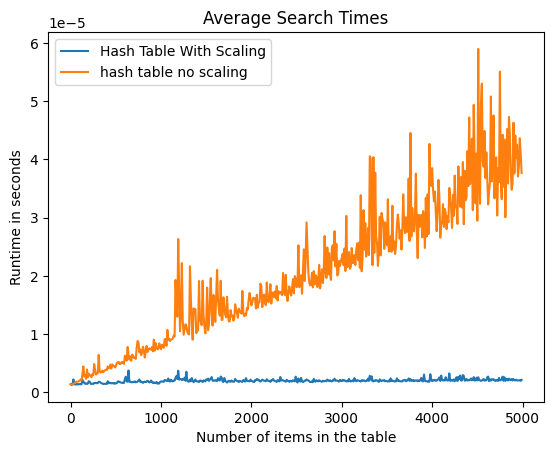

In [32]:
import random
import time
from matplotlib import pyplot as plt
def make_key():
    str = ''
    letters = ['a']
    for i in range(random.randint(1,20)):
        str += chr(random.randint(ord('a'),ord('z')))
    return str

def time_search(d,keys):
    times = []
    for _ in range(100):
        start = time.perf_counter()
        key = random.choice(keys)
        x = d[key[0]]
        end = time.perf_counter()
        times.append(end-start)
    return sum(times)/len(times)

def make_junk_items():
    junk_items = []
    for _ in range(5000):
        key = make_key()
        value = random.randint(0,10000)
        junk_items.append((key,value))

    d1 = HashTable()
    d2 = HashTable_NoScaling()
    times1 = []
    times2 = []
    keys = []

    for n in range(len(junk_items)):
        item = junk_items.pop(random.randint(0,len(junk_items)-1))
        keys.append(item)
        d1[item[0]] = item[1]
        d2[item[0]] = item[1]

        if n%10 == 0:
            times1.append(time_search(d1,keys))
            times2.append(time_search(d2,keys))

    fig, ax = plt.subplots()
    x_axis = range(0,5000,10)
    ax.set_title("Average Search Times")
    ax.set_xlabel("Number of items in the table")
    ax.set_ylabel("Runtime in seconds")
    ax.plot(x_axis,times1,label = 'Hash Table With Scaling')
    ax.plot(x_axis,times2,label = 'hash table no scaling')
    ax.legend()
    plt.show()
    
make_junk_items()

As we can see the hash table with scaling performs much better.